# Automatidata project: Statistical analysis

## TASK

New York City Taxi & Limousine Commission (New York City TLC) company as a client wants to reveal the relationship between fare amount and payment type. The goal is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. 

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown


# **Conduct an A/B test**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
taxi_data = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col = 0)

In [3]:
taxi_data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [4]:
taxi_data["payment_type"]=taxi_data["payment_type"].astype('category')

In [5]:
taxi_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


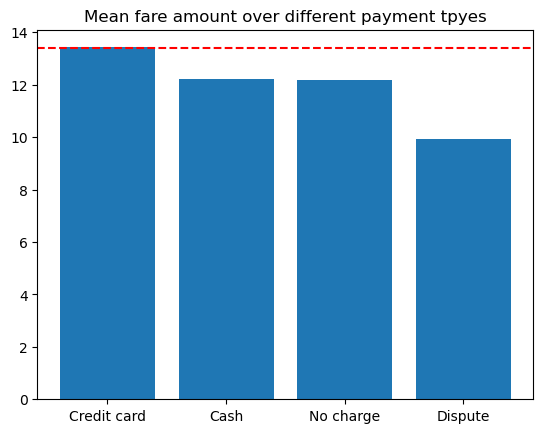

,fare_amount
payment_type,
Credit card,13.429748
Cash,12.213546
No charge,12.186116
Dispute,9.913043


In [6]:
payments_mean=taxi_data.copy()
payments_mean['payment_type'].replace({1:"Credit card",
                      2:"Cash",
                      3:"No charge",
                      4:"Dispute"}, inplace=True)
data=payments_mean.groupby('payment_type')[['fare_amount']].mean()
fig=plt.bar(x=data.index, height=data['fare_amount'])
plt.axhline(y=13.42, linestyle='--', color='r')
plt.title('Mean fare amount over different payment tpyes')
plt.show()
data


### Hypothesis testing

Sample data shows that rider who prefers  credit card pay large fare amount than others. The difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, the hypothesis test must be conducted.

**Null and alternative hypotheses:**

* $H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

* $H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

**Selected test procedure:**
5% as the significance level is selected and proceed with a two-sample t-test.

In [7]:
credit_card = taxi_data[taxi_data['payment_type'] == 1]['fare_amount']
cash = taxi_data[taxi_data['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

**TEST RESULT:** 

Since the p-value is significantly smaller than the significance level of 5%, you reject the null hypothesis. There is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

**Key Business Insights**

- Encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.
- For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that fare amount determines payment type, rather than vice versa.